# Insert data story name here
By Nicole Mbithe, ncm2144

# Step 1: Import/download the necessary libraries

 Note that if these are not installed on your computer you might want to install them before running the notebook. The easiest way is to "pip install " on your computer.

In [10]:
import nltk 
import string
import matplotlib
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
en_stopwords = set(stopwords.words('english')) 
import pandas as pd

import os
os.getcwd()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nicolembithe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicolembithe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nicolembithe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


'/Users/nicolembithe/Documents/GitHub/fall2019-proj1--nicolembithe'

# Step 2: Reading the data, data cleaning and preparation for analysis

In [2]:
#Load the data in. This creates a dataframe with all the data
lyrics = pd.read_csv("data/lyrics.csv")

#Helper function to help clean the data
def preprocess(v):
    
    #tokenize the sentences
    x = nltk.word_tokenize(v)
    
    #remove punctuation
    x = [word for word in x if word not in string.punctuation]
    
    #remove stopwords
    x = [word.lower() for word in x if word not in  en_stopwords]
    
    return x

#Also want to get the sentiment score for each song based on the sentences in the song and add a column with
sid = SentimentIntensityAnalyzer()
def get_sentiments(v):
    
    #get the sentences in the song
    x = nltk.sent_tokenize(v)
    
    #get the seniment score for the each sentence and track the max and the min
    max_sent = -float('inf')
    min_sent = float('inf')
    
    for sentence in x:
        score = sid.polarity_scores(sentence)['compound']
        max_sent = score if score > max_sent else max_sent
        min_sent = score if score < min_sent else min_sent

    
    return pd.Series([max_sent, min_sent], index=['max_sent', 'min_sent'])
    
#get the sentiment scores for each song
lyrics = pd.concat([lyrics, lyrics['lyrics'].apply(get_sentiments)], axis = 1)

#get the cleaned words from the song lyrics
lyrics['lyrics'] = lyrics['lyrics'].apply(preprocess)
lyrics.year = lyrics.year.replace({702: 1998, 112:2002})
lyrics['year'] = pd.to_datetime(lyrics['year'], format = "%Y")

# Step 3: Exploratory analysis of the data

In [89]:
#Get most common words per genre to see what the 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerato

Folk = lyrics[(lyrics.genre == 'Folk')]
Jazz = lyrics[(lyrics.genre == 'Jazz')]
Hip_Hop = lyrics[(lyrics.genre == 'Hip-Hop')]
R_n_B = lyrics[(lyrics.genre == 'R&B')]
Pop = lyrics[(lyrics.genre == 'Pop')]
Metal = lyrics[(lyrics.genre == 'Metal')]

['/Users/nicolembithe/Documents/GitHub/fall2019-proj1--nicolembithe', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions', '/Users/nicolembithe/.ipython', '/Users/nicolembithe/Library/Python/3.7/bin', '/Users/nicolembithe/Library/Python/3.7/bin', '/Users/nicolembithe/Library/Python/3.7/bin', '/Users/nicolembithe/Library/Python/3.7/bin', '/Users/nicolembithe/Library/Python/3.7/bin', '/Users/nicolembithe/Library/Python/3.7/bin']


ModuleNotFoundError: No module named 'wordcloud'

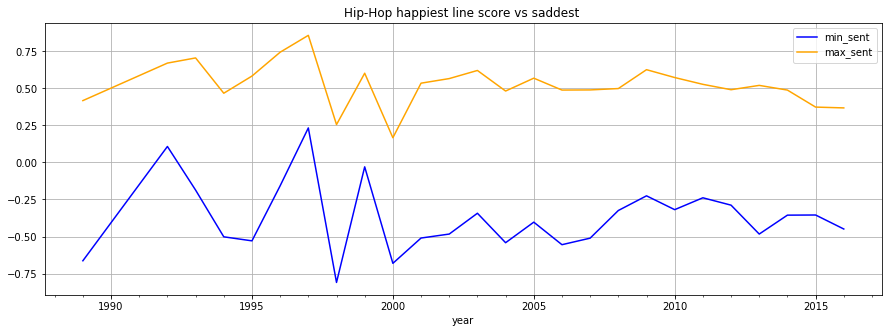

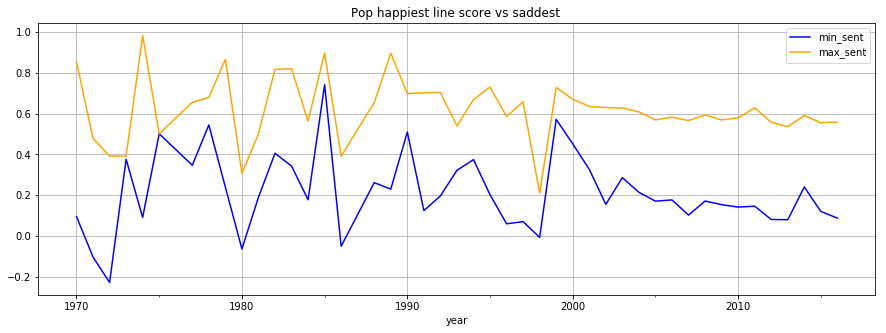

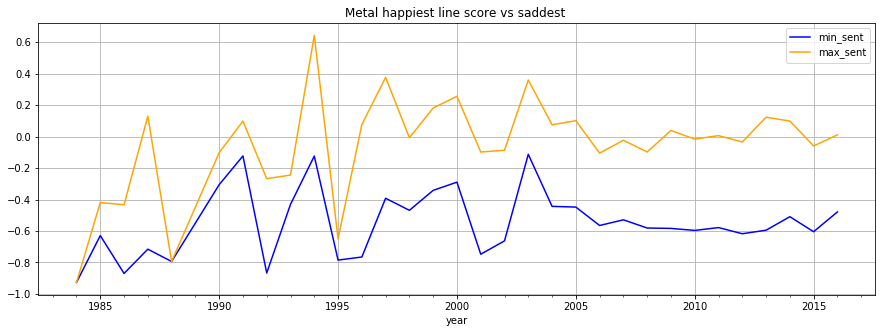

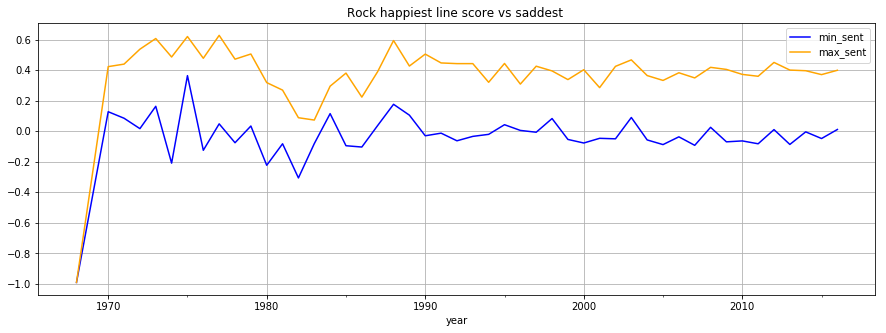

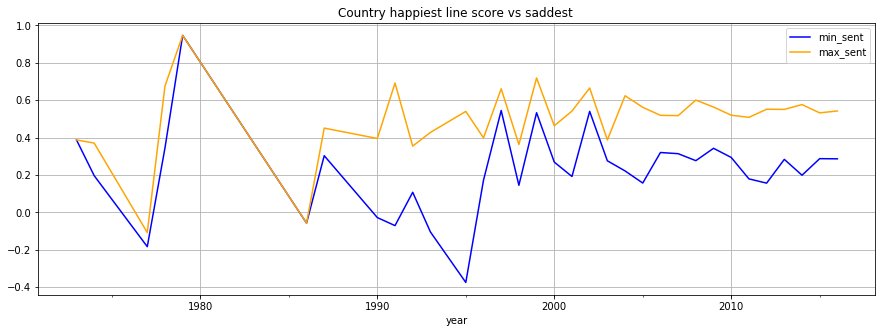

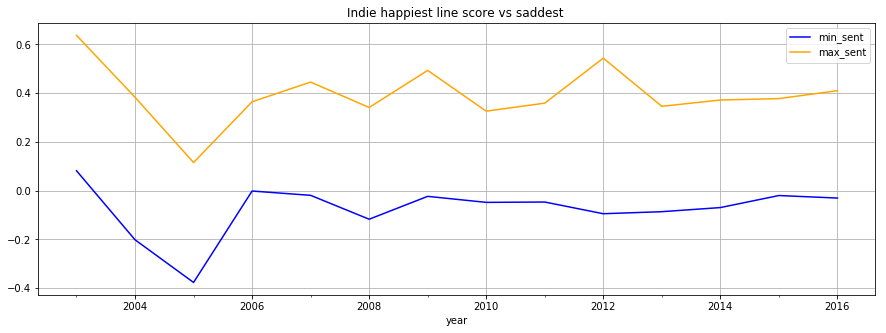

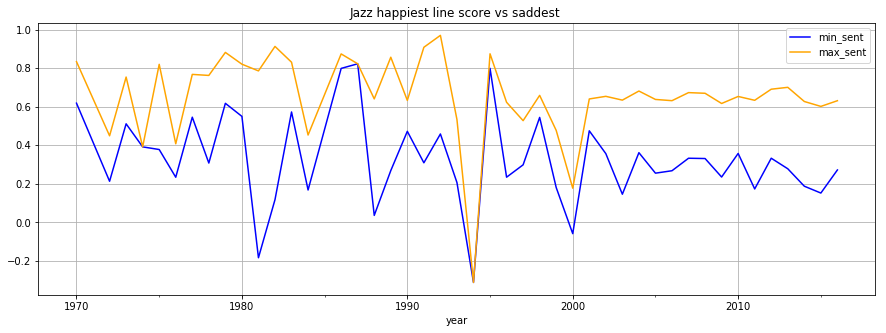

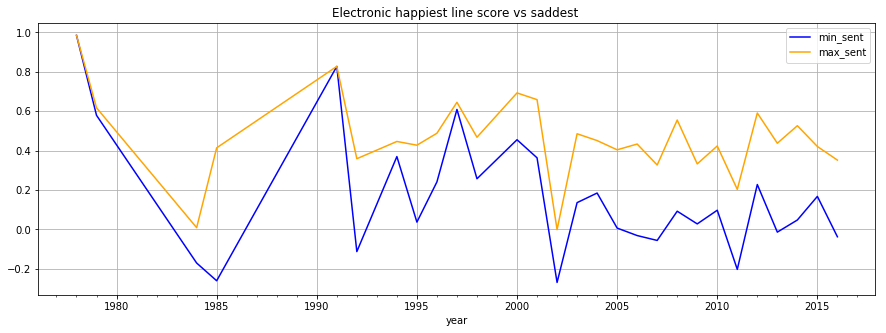

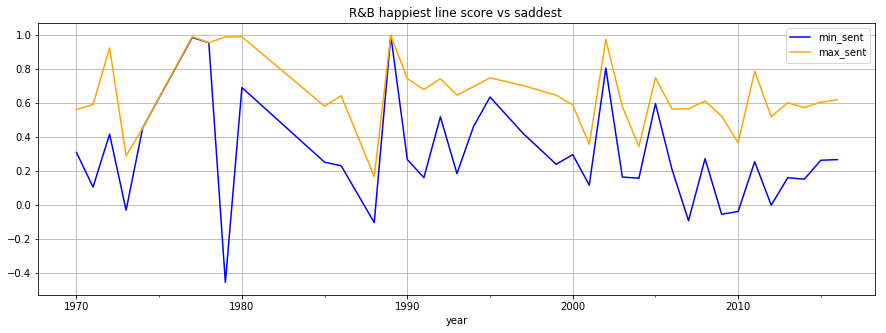

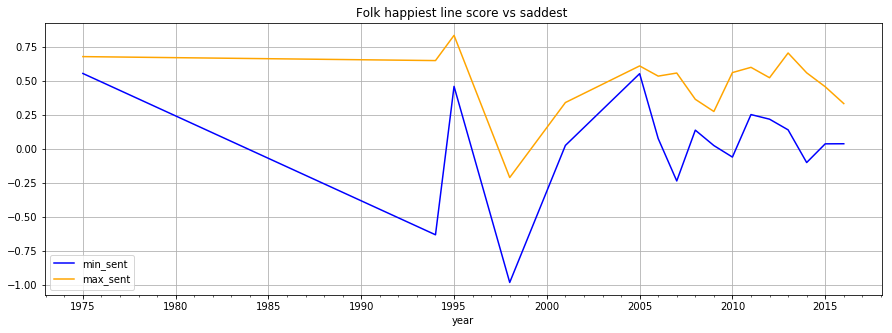

In [90]:
#Do a word cloud by genre
#Check max hapiness scored by genre
#Check max hapiness score by the year and observes the gtresn
#Determine what is the most emotional genre in music
#need to update the data for the 2 songs with the wrong date so that we can plot
genres = lyrics['genre'].drop_duplicates().tolist()
genres = [genre for genre in genres if not (genre =='Not Available' or genre =='Other') ]
for genre in genres: 
    ax = lyrics[(lyrics.genre == genre)][['year', 'min_sent']].set_index('year').resample('Y').mean().interpolate(method = 'linear').plot(cmap = 'winter')
    lyrics[(lyrics.genre == genre)][['year', 'max_sent']].set_index('year').resample('Y').mean().interpolate(method = 'linear').plot(grid = True, figsize = (15,5), color = 'orange', ax =ax, title = "{} happiest line score vs saddest ".format(genre) )

#do the plot with some of them
Folk = lyrics[(lyrics.genre == 'Folk')]
Jazz = lyrics[(lyrics.genre == 'Jazz')]
Hip_Hop = lyrics[(lyrics.genre == 'Hip-Hop')]
R_n_B = lyrics[(lyrics.genre == 'R&B')]
Pop = lyrics[(lyrics.genre == 'Pop')]
Metal = lyrics[(lyrics.genre == 'Metal')]

In [ ]:
len(Pop)

In [5]:
N = 5
count = 0
count = 0 if count == N else N + 1  

In [6]:
count

6

In [7]:
type(sid.polarity_scores("I'm so happy")['compound'])

float

In [8]:
df = pd.concat([lyrics, lyrics], axis =1)
df.head()

,song,year,artist,genre,lyrics,max_sent,min_sent,song,year,artist,genre,lyrics,max_sent,min_sent
0,when-you-were-with-me,2009-01-01,a,Hip-Hop,"[i, stopped, house, called, home, it, little, ...",0.6533,-0.7906,when-you-were-with-me,2009-01-01,a,Hip-Hop,"[i, stopped, house, called, home, it, little, ...",0.6533,-0.7906
1,careless-whisper,2009-01-01,a,Hip-Hop,"[i, feel, unsure, as, i, take, hand, lead, dan...",0.7567,0.7567,careless-whisper,2009-01-01,a,Hip-Hop,"[i, feel, unsure, as, i, take, hand, lead, dan...",0.7567,0.7567
2,2-59,2007-01-01,a,Hip-Hop,"[mark, sunday, football, i, got, boot, pitch, ...",0.8225,-0.9671,2-59,2007-01-01,a,Hip-Hop,"[mark, sunday, football, i, got, boot, pitch, ...",0.8225,-0.9671
3,power-of-desire,2007-01-01,a,Hip-Hop,"[chris, fallin, fantasy, i, threw, away, desti...",-0.0258,-0.0258,power-of-desire,2007-01-01,a,Hip-Hop,"[chris, fallin, fantasy, i, threw, away, desti...",-0.0258,-0.0258
4,you-re-not-in-love,2007-01-01,a,Hip-Hop,"[something, way, touch, hold, hand, hold, back...",-0.9947,-0.9947,you-re-not-in-love,2007-01-01,a,Hip-Hop,"[something, way, touch, hold, hand, hold, back...",-0.9947,-0.9947
